# Análisis de datos de los primeros experimentos pilotos


## Data Wrangling

<font size="3">Se presenta el proceso del análisis de los datos de los primeros experimentos piloto del proyecto de investigación **"Toma de decisión colectiva durante el forrajeo social"** utilizando el videojuego multijugador online que programé usando Unity de nombre **"The Foraging Game"**, el cual se puede encontrar en el siguiente enlace:

Para el correcto análisis de los datos obtenidos durante los primeros experimentos pilotos, pasaremos por distintas etapas, empezando por el Data Wrangling, que es una limpieza y procesamiento de los datos brutos (raw data) para poder analizarlos.<\font>

In [194]:
# Primero vemos el contenido del archivo .csv para conocer su estructura:
import csv

with open("Data Sets/Positions_Round_1.csv") as csvfile:
    # Leemos el contenido del archivo .csv
    line_reader = csv.reader(csvfile, delimiter=',')
    
    # Imprimimos en pantalla las primeras 10 líneas
    counter = 0
    for line in line_reader:
        print(', '.join(line))
        
        counter += 1
        if(counter == 10):
            break

Session date: 6/18/2021 8:28:26 PM
 
Players data every 1 seconds,  with the format: 
 
Player Name,  xPos,  yPos,  zPos,  xRot,  yRot,  score ,  Patch Selection
 
Francisco,  385,  1.1,  372.5,  0,  270,  0,  No Selection,  ozmar,  380,  1.1,  372.5,  0,  270,  0,  No Selection,  Daniel,  375,  1.1,  372.5,  0,  270,  0,  No Selection,  JoseCuellar,  370,  1.1,  372.5,  0,  270,  0,  No Selection,  Jose Angel Ruiz Garcia,  365,  1.1,  372.5,  0,  270,  0,  No Selection,  alan,  385,  1.1,  377.5,  0,  270,  0,  No Selection,  damselfly,  380,  1.1,  377.5,  0,  270,  0,  No Selection,  
Francisco,  385,  1.1,  372.5,  0,  270,  0,  No Selection,  ozmar,  380,  1.1,  372.5,  0,  270,  0,  No Selection,  Daniel,  375,  1.1,  372.5,  0,  270,  0,  No Selection,  JoseCuellar,  370,  1.1,  372.5,  0,  270,  0,  No Selection,  Jose Angel Ruiz Garcia,  365,  1.1,  372.5,  0,  270,  0,  No Selection,  alan,  385,  1.1,  377.5,  0,  270,  0,  No Selection,  damselfly,  380,  1.1,  377.5,  0,  

<font size="3">Hay varias cosas que podemos observar del archivo, primero, las líneas 1 y 3 no son información que se deba cargar al DataFrame.

Segundo, no hay un encabezado para todas las columnas, pues el que hay en la línea 5 es meramente informativo y no está pensado para ser cargado en una estructura de datos.

Tercero, los datos se recolectaron leyendo la información de cada jugador (Nombre, posición, etc) en un momento determinado del juego y fueron guardados en la siguiente línea del archivo, por lo que en una misma línea se encuentran todos los jugadores.

Con ésto en mente, al cargar nuestro datos en un DataFrame, hay que saltarnos las primeras 6 líneas, pues no forman parte de los datos que queremos analizar, pues si intentamos cargar los datos así, obtendremos un error en el número de columnas del DataFrame, pues debido a la forma en que está escrito el .csv, la segunda línea solo contiene dos valores separados por comas: 

<font color='blue'>Players data every 1 seconds</font> , <font color='red'>with the format</font>

pero la línea 5 tiene 8:

<font color='blue'>Player Name</font> , <font color='red'>xPos</font> , <font color='blue'>yPos</font> , <font color='red'>zPos</font> , <font color='blue'>xRot</font> , <font color='red'>yRot</font> , <font color='blue'>score</font> , <font color='red'>Patch Selection</font></font> 

In [213]:
import pandas as pd

# Guardamos los datos en un DataFrame llamado "df", pero nos saltamos las primeras 6 líneas del archivo
df = pd.read_csv("Data Sets/Positions_Round_1.csv", skiprows=6)

# Vemos los primeros 10 elementos del DataFrame
df.head()

,Francisco,385,1.1,372.5,0,270,0.1,No Selection,ozmar,380,...,No Selection.5,damselfly,380.1,1.1.6,377.5.1,0.12,270.6,0.13,No Selection.6,
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection,


<font size="3">Para facilitar el manejo de las columnas, momentáneamente vamos a cambiar los nombres de cada una por índices numéricos, pues como podemos observar abajo, tienen los nombres de la primer entrada de nuestros datos y es complicado trabajar con ésos índices:</font>

In [214]:
# Vemos el nombre de las columnas para trabajar con ellas adecuadamente
df.columns

Index(['Francisco', ' 385', ' 1.1', ' 372.5', ' 0', ' 270', ' 0.1',
       ' No Selection', ' ozmar', ' 380', ' 1.1.1', ' 372.5.1', ' 0.2',
       ' 270.1', ' 0.3', ' No Selection.1', ' Daniel', ' 375', ' 1.1.2',
       ' 372.5.2', ' 0.4', ' 270.2', ' 0.5', ' No Selection.2', ' JoseCuellar',
       ' 370', ' 1.1.3', ' 372.5.3', ' 0.6', ' 270.3', ' 0.7',
       ' No Selection.3', ' Jose Angel Ruiz Garcia', ' 365', ' 1.1.4',
       ' 372.5.4', ' 0.8', ' 270.4', ' 0.9', ' No Selection.4', ' alan',
       ' 385.1', ' 1.1.5', ' 377.5', ' 0.10', ' 270.5', ' 0.11',
       ' No Selection.5', ' damselfly', ' 380.1', ' 1.1.6', ' 377.5.1',
       ' 0.12', ' 270.6', ' 0.13', ' No Selection.6', ' '],
      dtype='object')

<font size="3">Aquí notamos que la última columna está vacía, así que habrá que eliminarla.</font>

In [215]:
# Eliminamos la columna vacía
df.drop([" "], axis=1, inplace=True)
df.head()

,Francisco,385,1.1,372.5,0,270,0.1,No Selection,ozmar,380,...,0.11,No Selection.5,damselfly,380.1,1.1.6,377.5.1,0.12,270.6,0.13,No Selection.6
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection


In [216]:
# Creamos una lista de números consecutivos del mismo tamaño que las columnas de nuestro DataFrame
columns_mapper = [0] * len(df.columns)
for i in range(len(df.columns)):
    columns_mapper[i] = columns_mapper[i-1] + 1

# Cambiamos el nombre de nuestras columnas
df.set_axis(columns_mapper, axis=1, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,ozmar,380.0,...,0,No Selection,damselfly,380.0,1.1,377.5,0,270.0,0,No Selection


<font size="3">Lo siguiente será organizar los datos por jugador, para ello, en primer lugar separamos las columnas que corresponden a cada jugador y las organizamos en un solo DataFrame al que le podamos poner encabezados que apliquen a todos los jugadores.

Para ello, sabemos que 8 columnas son las que contienen la información de cada jugador, así que extraemos las 8 columnas de cada jugador.</font>

In [217]:
# Arovechamos el mapeo que hicimos antes para extraer las columnas de cada jugador
player_columns = [columns_mapper[x:x+8] for x in range(0, len(columns_mapper), 8)]

# Creamos una lista de DataFrames con cada jugador
players = []
for i in range(len(player_columns)):
    players.append(df[player_columns[i]]) 

# Renombramos las columnas de los DataFrames
columns_names = ["Player_Name", "X_Pos", "Y_Pos", "Z_Pos", "X_Rot", "Y_Rot", 
                 "Score", "Patch_Selection"]

for i in range(len(players)):
    players[i].set_axis(columns_names, axis=1, inplace=True)

# Creamos el nuevo DataFrame con todos los jugadores
new_df = pd.concat(players)
new_df

,Player_Name,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection
...,...,...,...,...,...,...,...,...
352,damselfly,264.2,2.2,737.0,0,257.8,0,No Selection
353,damselfly,253.5,1.5,732.7,0,245.8,0,No Selection
354,damselfly,242.6,1.9,727.8,0,245.8,0,No Selection
355,damselfly,231.9,2.1,722.9,0,245.8,0,No Selection


<font size="3">Ahora, cambiamos los índices por el nombre de cada jugador, pero como la función *set_index()* es destructiva, primero guardaremos el índice actual (que representa el tiempo de juego en segundos) para no perderlo.</font>


In [218]:
# Creamos una nueva columna con el índice actual
new_df["Game_Time"] = new_df.index
new_df

,Player_Name,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
0,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,0
1,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,1
2,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,2
3,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,3
4,Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,4
...,...,...,...,...,...,...,...,...,...
352,damselfly,264.2,2.2,737.0,0,257.8,0,No Selection,352
353,damselfly,253.5,1.5,732.7,0,245.8,0,No Selection,353
354,damselfly,242.6,1.9,727.8,0,245.8,0,No Selection,354
355,damselfly,231.9,2.1,722.9,0,245.8,0,No Selection,355


In [219]:
# Cambiamos el índice
new_df.set_index("Player_Name", inplace=True)
new_df

,X_Pos,Y_Pos,Z_Pos,X_Rot,Y_Rot,Score,Patch_Selection,Game_Time
Player_Name,,,,,,,,
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,0
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,1
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,2
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,3
Francisco,385.0,1.1,372.5,0,270.0,0,No Selection,4
...,...,...,...,...,...,...,...,...
damselfly,264.2,2.2,737.0,0,257.8,0,No Selection,352
damselfly,253.5,1.5,732.7,0,245.8,0,No Selection,353
damselfly,242.6,1.9,727.8,0,245.8,0,No Selection,354


In [228]:
# Por último, quitamos los espacios vacíos que hay en las columnas y los índices:

new_df.columns = [x.strip() for x in new_df.columns]
new_df.index = [x.strip() for x in new_df.index]


<font size="3">Con todo ésto, conseguimos que al buscar por el nombre del jugador, obtengamos todos los datos relacionados a él</font>

In [229]:
# Para ver los nombres de todos los jugadores, podemos usar la función unique()
new_df.index.unique()

Index(['Francisco', 'ozmar', 'Daniel', 'JoseCuellar', 'Jose Angel Ruiz Garcia',
       'alan', 'damselfly'],
      dtype='object')

In [230]:
# Y para las columnas el atributo .columns que ya habíamos visto
new_df.columns

Index(['X_Pos', 'Y_Pos', 'Z_Pos', 'X_Rot', 'Y_Rot', 'Score', 'Patch_Selection',
       'Game_Time'],
      dtype='object')

In [241]:
# Aquí un ejemplo de cómo consultar los datos:
new_df.loc["ozmar", ["Game_Time", "X_Pos", "Z_Pos", "Score"]]

,Game_Time,X_Pos,Z_Pos,Score
ozmar,0,380.0,372.5,0
ozmar,1,380.0,372.5,0
ozmar,2,380.0,372.5,0
ozmar,3,380.0,372.5,0
ozmar,4,380.0,372.5,0
...,...,...,...,...
ozmar,352,123.2,503.2,16
ozmar,353,130.5,503.7,16
ozmar,354,130.9,503.7,16
ozmar,355,130.9,503.7,16


## Gráficas

<font size="3">Ahora que ya podemos acceder de forma fácil a los datos, empezaremos con el análisis graficando las posiciones de los jugadores a lo largo de la partida.</font>

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
# Extraemos la información que queremos graficar
player = new_df.loc["ozmar", ["Game_Time", "X_Pos", "Z_Pos"]]
player.head()

,Game_Time,X_Pos,Z_Pos
ozmar,0,380.0,372.5
ozmar,1,380.0,372.5
ozmar,2,380.0,372.5
ozmar,3,380.0,372.5
ozmar,4,380.0,372.5


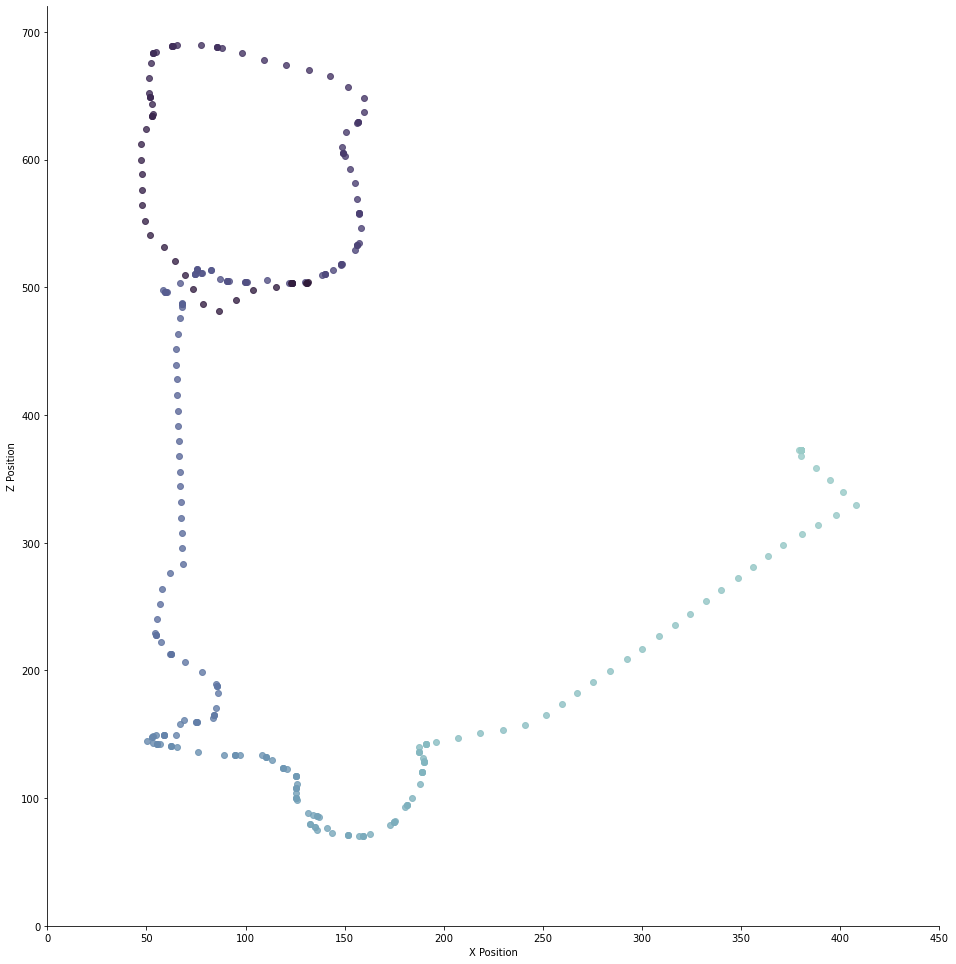

In [253]:
# Creamos una gráfica de dispersión usando seaborn
g = sns.lmplot(x = 'X_Pos', y = 'Z_Pos', data = player, fit_reg = False, legend = False, hue = 'Game_Time', palette = "ch:s=.5,rot=-.5")

# Seleccionamos los límites de los ejes
g.set(xlim=(0,450),ylim=(0,720))

# Cambiamos el nombre de los ejes
g.set_axis_labels('X Position', 'Z Position')

# Cambiamos el tamaño del gráfico
g.fig.set_size_inches(15, 15)